## **Bootcamp: Ciencia de Datos e Inteligencia Artificial**
## **Proyecto del Módulo 7: Técnicas avanzadas para ciencia de datos y empleabilidad**

Hola, ya es el último proyecto, has avanzado y aprendido mucho hasta acá. ¡Muchas felicidades!

Es hora de poner en práctica todo lo que hemos aprendido a lo largo de nuestra travesía.

Lee el proyecto y revisa con cuidado cada una de las instrucciones. Procura plasmar todo tu potencial para que lo concluyas de manera sobresaliente.

¡Éxito!

# Objetivos
- Aplicar con éxito todos los conocimientos que has adquirido a lo largo del Bootcamp.
- Consolidar las técnicas de limpieza, entrenamiento, graficación y ajuste a modelos de *Machine Learning*.
- Generar una API que brinde predicciones como resultado a partir de datos enviados.


# Proyecto

1. Selecciona uno de los siguientes *datasets*:
  - Imágenes de rayos X de pecho para detectar neumonía: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
  - *Reviews* de aplicaciones de la Google Play Store: https://www.kaggle.com/datasets/lava18/google-play-store-apps
  - Estadísticas demográficas de los ganadores del premio Oscar de la Academia: https://www.kaggle.com/datasets/fmejia21/demographics-of-academy-awards-oscars-winners
  - Aspiraciones profesionales de la generación Z: https://www.kaggle.com/datasets/kulturehire/understanding-career-aspirations-of-genz

Cada uno representa un *dataset*, un problema y una forma diferente de abordarlo. Tu tarea es identificar las técnicas y modelos que podrías usar para tu proyecto.

2. Debes hacer un análisis exploratorio y limpieza de los datos. Usa las ténicas que creas convenientes.

3. Entrena el modelo de *Machine Learning*, procesamiento de lenguaje natural o red neuronal que creas adecuado.

4. Genera por lo menos dos gráficas y dos métricas de rendimiento; explica las puntuaciones de rendimiento que amerite tu problema. Todas las gráficas de rendimiento que realices deben tener leyendas, colores y títulos personalizados por ti.

  - Además, antes de subir el modelo a "producción", deberás realizar un proceso de ensambles (*ensemblings*) y de ajuste de hiperparámetros o *tuning* para intentar mejorar la precisión y disminuir la varianza de tu modelo.

5. Construye una API REST en la que cualquier usuario pueda mandar datos y que esta misma devuelva la predicción del modelo que has hecho. La API debe estar en la nube, ya sea en un servicio como Netlify o Ngrok, para que pueda ser consultada desde internet.

6. Genera una presentación del problema y del modelo de solución que planteas. Muestra gráficas, datos de rendimiento y explicaciones. Esta presentación debe estar enfocada a personas que no sepan mucho de ciencia de datos e inteligencia artificial.

7. **Solamente se recibirán trabajos subidos a tu cuenta de GitHub con un README.md apropiado que explique tu proyecto**.

## Criterios de evaluación

| Actividad | Porcentaje | Observaciones | Punto parcial
| -- | -- | -- | -- |
| Actividad 1. Limpieza y EDA | 20 | Realiza todas las tareas necesarias para hacer el EDA y la limpieza correcta, dependiendo de la problemática. Debes hacer como mínimo el análisis de completitud, escalamiento (si aplica) y tokenización (si aplica). | Realizaste solo algunas tareas de exploración y limpieza y el modelo se muestra aún con oportunidad de completitud, escalamiento y/o mejora. |
| Actividad 2. Entrenamiento del modelo | 20 | Elige el modelo y algoritmo adecuados para tu problema, entrénalo con los datos ya limpios y genera algunas predicciones de prueba. | No has realizado predicciones de prueba para tu modelo de ML y/o tu modelo muestra una precisión menor al 60 %. |
| Actividad 3. Graficación y métricas | 20 | Genera por lo menos dos gráficas y dos muestras de métricas que permitan visualizar el rendimiento y precisión del modelo que construiste. Además, realizaste los procesos de *tuning* y ensambles adecuados para tu problema. | Las gráficas no tienen leyendas y colores customizados, solo muestras una gráfica o no realizaste el *tuning* de hiperparámetros.
| Actividad 4. API REST | 20 | Generaste con éxito un *link* público en el que, por método POST, se puede mandar información y la API REST devuelve una predicción junto con el porcentaje de confianza de esta misma. | N/A
| Actividad 5. Presentación | 20 | Genera una presentación en la que establezcas como mínimo: el problema, proceso de solución, metodologías usadas, gráficas de rendimiento, demostración del modelo y aprendizajes obtenidos. Debes redactarla con términos que pueda entender cualquier persona, no solo científicos de datos. | La presentación no expone con claridad o en términos coloquiales el proceso de creación del modelo, sus ventajas y muestras de rendimiento.

**Mucho éxito en tu camino como Data Scientist.**



> Agregar bloque entrecomillado



#  **Selección de proyecto**
  El proyecto elegido es el de predicción de neumonía en base a imagenes de rayos X:

    - Imágenes de rayos X de pecho para detectar neumonía: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia



# **Análisis EDA imagenes rayos x**

In [1]:
!pip install opencv-python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import random
import os
import cv2
from PIL import Image
from collections import defaultdict
import hashlib

!pip install keras-tuner tensorflow
import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt
from tensorflow.keras import layers, models
from mpl_toolkits.mplot3d import Axes3D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.applications import ResNet50, VGG16
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.4 MB/s eta 0:00:00


In [2]:
# Conexión con drive personal
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## ***Visualización imagenes de entranamiento pacientes normales***
Se visualizan las imagenes de pacientes normales en distintos formatos para inspección macro del conjunto de entrenamiento

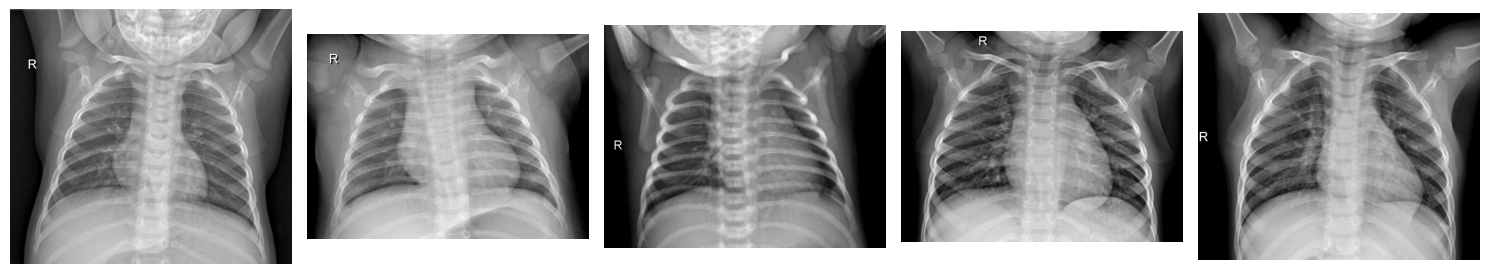

In [3]:
# Ruta de la carpeta
img_norm = '/content/drive/MyDrive/Archivos DS C8/Tareas/Tarea modulo 7/train/NORMAL'

# Obtener la lista de archivos en la carpeta
image_files_norm = [f for f in os.listdir(img_norm) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Seleccionar 5 imágenes aleatorias
img_norm2 = random.sample(image_files_norm, min(5, len(image_files_norm)))

# Crear una figura para mostrar las imágenes
fig, axes = plt.subplots(1, 5, figsize=(15, 6))  # Generar fila con las 5 imagenes
axes = axes.ravel()

# Cargar y mostrar las imágenes seleccionadas
for i, image_file in enumerate(img_norm2):
    image_path = os.path.join(img_norm, image_file)  # Ruta completa de la imagen
    img = cv2.imread(image_path)  # Cargar imagen en formato BGR
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Para mantener color original de la radiografía

    axes[i].imshow(img)
    axes[i].axis('off')  # Ocultar los ejes

plt.tight_layout()
plt.show()


## ***Visualización imagenes de entrenamiento pacientes con pneumonia***
Se visualización las imagenes de pacientes enfermos para ver si son similares a los normales y diferentes formatos para inspección macro de la base de datos

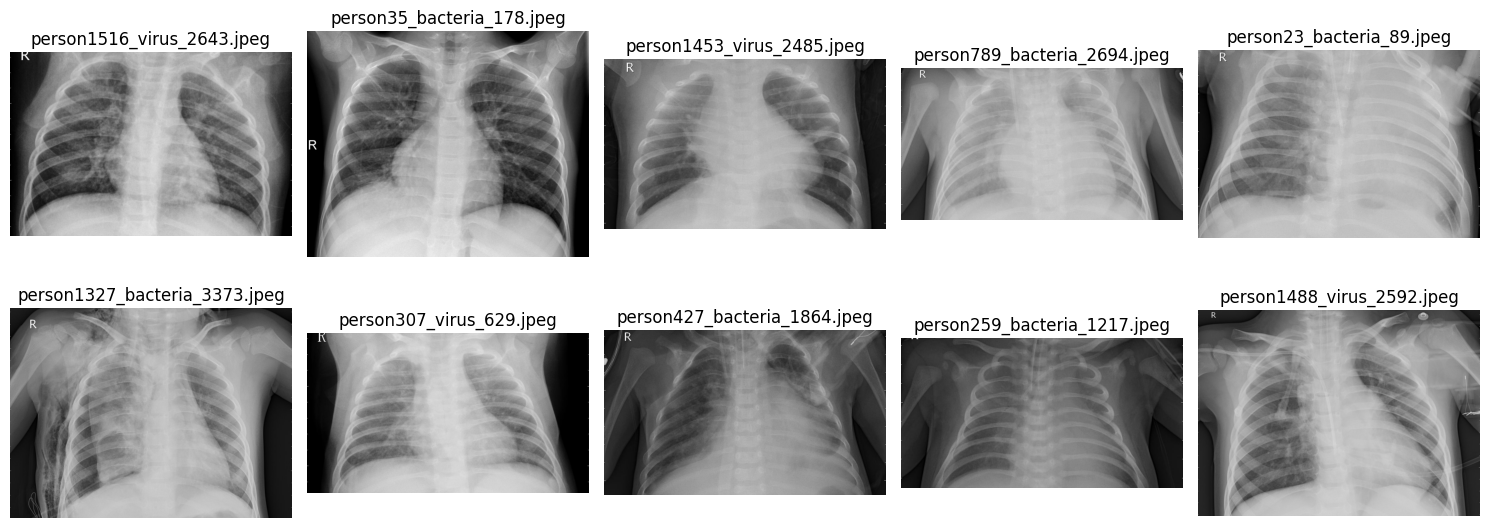

In [4]:
# Ruta de la carpeta con las imágenes
img_neum = "/content/drive/MyDrive/Archivos DS C8/Tareas/Tarea modulo 7/train/PNEUMONIA"

# Obtener lista de archivos en la carpeta
image_files_neum = [f for f in os.listdir(img_neum) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Seleccionar 10 imágenes aleatorias
img_neum2 = random.sample(image_files_neum, min(10, len(image_files_neum)))

# Mostrar imágenes
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for ax, img in zip(axes.flatten(), img_neum2):
    img_path = os.path.join(img_neum, img)
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Para mantener color original de la radiografía
    ax.imshow(image)
    ax.set_title(img)
    ax.axis("off")

plt.tight_layout()
plt.show()


## ***Cuantificación de imagenes por tipo de paciente***
Se cuantifican el número de pacientes sanos y enfermos para ver si hay equilibro en los casos de la base de datos. Al efectuar los graficos se cuantifica que existen mas pacientes enfermos que sanos en la base de datos.

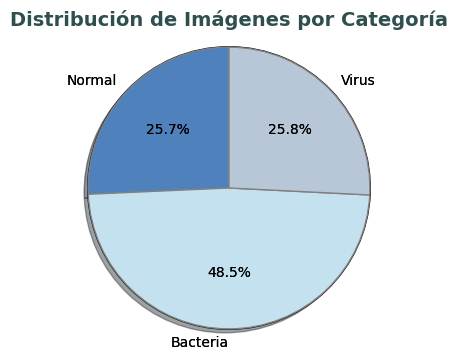

Total de imágenes en 'NORMAL': 1341
Total de imágenes con 'bacteria' en 'PNEUMONIA': 2530
Total de imágenes con 'virus' en 'PNEUMONIA': 1345


In [5]:
# Obtener lista de archivos en la carpeta
imagenes_norm = [f for f in os.listdir(img_norm) if f.endswith(('.png', '.jpg', '.jpeg'))]
imagenes_neum = [f for f in os.listdir(img_neum) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Contar todas las imágenes en la carpeta NORMAL
normal_count = len(imagenes_norm)

# Contar imágenes que contienen "bacteria" y "virus" en la carpeta PNEUMONIA
bacteria_count = sum(1 for img in imagenes_neum if "bacteria" in img.lower())
virus_count = sum(1 for img in imagenes_neum if "virus" in img.lower())

# Etiquetas y datos
labels = ['Normal', 'Bacteria', 'Virus']
sizes = [normal_count, bacteria_count, virus_count]

# Colores para cada sección
colors = ['#4f81bd', '#c4e1f0', '#b7c7d7']

# Gráfica de torta
plt.figure(figsize=(4, 4))  # Tamaño más grande para mejor visibilidad
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'black', 'linewidth': 1.5, 'linestyle': 'solid'})
plt.title("Distribución de Imágenes por Categoría", fontsize=14, fontweight='bold', color='darkslategray')

# Agregar sombra para darle un toque tridimensional
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, shadow=True, wedgeprops={'edgecolor': 'grey', 'linewidth': 1.0, 'linestyle': 'solid'})

plt.axis('equal')  # Asegura que la gráfica sea un círculo
plt.show()

# Mostrar resultados
print(f"Total de imágenes en 'NORMAL': {normal_count}")
print(f"Total de imágenes con 'bacteria' en 'PNEUMONIA': {bacteria_count}")
print(f"Total de imágenes con 'virus' en 'PNEUMONIA': {virus_count}")


## ***Visualización del formato de imagenes presentes en la data***
Se ejecuta este código para identificar los formatos de imagenes presentes en la base de datos. Se corrobora que toda la base tiene imagenes con formato .jpeg y no requiere transformación.

In [6]:
# Función para contar imágenes por formato por separado
def count_images_by_format(image_folder):
    # Diccionario para contar cada tipo de imagen
    format_count = {'.png': 0, '.jpg': 0, '.jpeg': 0}
    for img_name in os.listdir(image_folder):
        # Verificar las extensiones de archivo
        if img_name.lower().endswith('.png'):
            format_count['.png'] += 1
        elif img_name.lower().endswith('.jpg'):
            format_count['.jpg'] += 1
        elif img_name.lower().endswith('.jpeg'):
            format_count['.jpeg'] += 1
    return format_count

# Contar imágenes por formato en las carpetas NORMAL y PNEUMONIA
norm_format_count = count_images_by_format(img_norm)
neum_format_count = count_images_by_format(img_neum)

# Mostrar los resultados
print(f"Total de imágenes por formato en la carpeta NORMAL:")
for ext, count in norm_format_count.items():
    print(f"Formato {ext}: {count}")

print(f"\nTotal de imágenes por formato en la carpeta PNEUMONIA:")
for ext, count in neum_format_count.items():
    print(f"Formato {ext}: {count}")


Total de imágenes por formato en la carpeta NORMAL:
Formato .png: 0
Formato .jpg: 0
Formato .jpeg: 1341

Total de imágenes por formato en la carpeta PNEUMONIA:
Formato .png: 0
Formato .jpg: 0
Formato .jpeg: 3875


## ***Distribución de la resolución de imagenes por tipo de paciente***
Este código se ejecuto para ver la distribución de tamaños de todas las imagenes de entrenamiento. Se corrobora que no hay una resolución predominante en la base de datos, por lo cual se deben llevar iamgenes a una misma resolución para facilitar entrenamiento de modelos

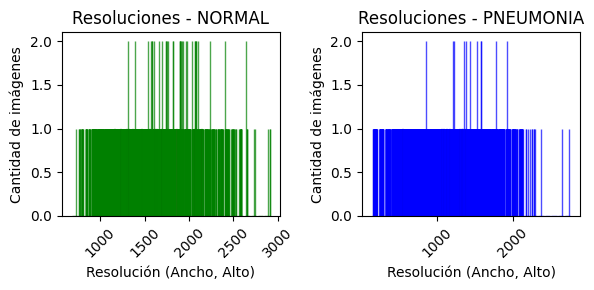

In [7]:
# Función para obtener las resoluciones de las imágenes
def get_image_resolutions(image_folder):
    resolutions = []
    for img_name in os.listdir(image_folder):
        if img_name.lower().endswith(('.jpeg')):  # Filtra las imágenes por extensión
            img_path = os.path.join(image_folder, img_name)
            try:
                # Abrir la imagen con Pillow
                with Image.open(img_path) as img:
                    # Obtener la resolución (ancho, alto)
                    resolutions.append(img.size)
            except Exception as e:
                print(f"Error al abrir la imagen {img_name}: {e}")
    return resolutions

# Obtener resoluciones para las imágenes en las carpetas NORMAL y PNEUMONIA
norm_resolutions = get_image_resolutions(img_norm)
neum_resolutions = get_image_resolutions(img_neum)

# Crear los histogramas
plt.figure(figsize=(6, 3))

# Histograma para la carpeta NORMAL
plt.subplot(1, 2, 1)  # (filas, columnas, índice)
plt.hist(norm_resolutions, bins=30, edgecolor='green', alpha=0.7)
plt.title('Resoluciones - NORMAL')
plt.xlabel('Resolución (Ancho, Alto)')
plt.ylabel('Cantidad de imágenes')
plt.xticks(rotation=45)

# Histograma para la carpeta PNEUMONIA
plt.subplot(1, 2, 2)  # (filas, columnas, índice)
plt.hist(neum_resolutions, bins=30, edgecolor='blue', alpha=0.7)
plt.title('Resoluciones - PNEUMONIA')
plt.xlabel('Resolución (Ancho, Alto)')
plt.ylabel('Cantidad de imágenes')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


## ***Estandarización del tamaño de las imagenes***
Se migran todos los tamaños de las imagenes a una resolución 224x224, dado que este tamaño es recomendable para redes neuronales. Para el caso de las imagenes de test y validación se usan el conjunto completo existente en ellas. En el caso de imagenes de entrenamiento se decide seleccionar 1341 imagenes aleatorias para pacientes normales y enfermos, para equilibrar el conjunto y no sesgar el entrenamiento del modelo.

In [8]:
# Definir las rutas de las carpetas
test_folder = '/content/drive/MyDrive/Archivos DS C8/Tareas/Tarea modulo 7/test'
val_folder = '/content/drive/MyDrive/Archivos DS C8/Tareas/Tarea modulo 7/val'
test_resized_folder = '/content/drive/MyDrive/Archivos DS C8/Tareas/Tarea modulo 7/test_resized'
val_resized_folder = '/content/drive/MyDrive/Archivos DS C8/Tareas/Tarea modulo 7/val_resized'

# Función para redimensionar y guardar las imágenes
def resize_images(src_folder, dest_folder, size=(224, 224)):
    # Recorrer todas las subcarpetas y archivos en la carpeta fuente
    for subdir, _, files in os.walk(src_folder):
        # Crear la misma subcarpeta en la carpeta de destino
        relative_path = os.path.relpath(subdir, src_folder)
        dest_subdir = os.path.join(dest_folder, relative_path)

        # Si la subcarpeta no existe, crearla
        if not os.path.exists(dest_subdir):
            os.makedirs(dest_subdir)

        # Recorrer los archivos de imagen
        for file in files:
            # Comprobar si el archivo es una imagen (puedes añadir más extensiones si es necesario)
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                # Ruta completa del archivo de origen
                src_file = os.path.join(subdir, file)

                # Ruta completa del archivo de destino
                dest_file = os.path.join(dest_subdir, file)

                # Abrir la imagen
                with Image.open(src_file) as img:
                    # Redimensionar la imagen
                    img_resized = img.resize(size)

                    # Guardar la imagen redimensionada
                    img_resized.save(dest_file)

# Redimensionar las imágenes en ambas carpetas
resize_images(test_folder, test_resized_folder)
resize_images(val_folder, val_resized_folder)

print("Las imágenes han sido redimensionadas y guardadas correctamente.")


Las imágenes han sido redimensionadas y guardadas correctamente.


In [9]:
import shutil

# Definir las rutas de las carpetas
train_folder = '/content/drive/MyDrive/Archivos DS C8/Tareas/Tarea modulo 7/train'
train_resized_folder = '/content/drive/MyDrive/Archivos DS C8/Tareas/Tarea modulo 7/train_resized'

# Función para redimensionar y guardar imágenes
def resize_images_randomly(src_folder, dest_folder, num_images=1341, size=(224, 224)):
    # Recorrer todas las subcarpetas y archivos en la carpeta fuente
    for subdir, _, files in os.walk(src_folder):
        # Filtrar solo las imágenes (por extensión)
        image_files = [file for file in files if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))]

        # Seleccionar aleatoriamente las imágenes (si hay suficientes)
        if len(image_files) > num_images:
            selected_files = random.sample(image_files, num_images)
        else:
            selected_files = image_files  # Si no hay suficientes imágenes, seleccionar todas

        # Crear la misma subcarpeta en la carpeta de destino
        relative_path = os.path.relpath(subdir, src_folder)
        dest_subdir = os.path.join(dest_folder, relative_path)

        # Si la subcarpeta no existe, crearla
        if not os.path.exists(dest_subdir):
            os.makedirs(dest_subdir)

        # Recorrer los archivos seleccionados
        for file in selected_files:
            # Ruta completa del archivo de origen
            src_file = os.path.join(subdir, file)

            # Ruta completa del archivo de destino
            dest_file = os.path.join(dest_subdir, file)

            # Abrir la imagen
            with Image.open(src_file) as img:
                # Redimensionar la imagen
                img_resized = img.resize(size)

                # Guardar la imagen redimensionada
                img_resized.save(dest_file)

# Crear carpeta de destino si no existe
if not os.path.exists(train_resized_folder):
    os.makedirs(train_resized_folder)

# Redimensionar las imágenes de cada subcarpeta
resize_images_randomly(train_folder, train_resized_folder)

print("Las imágenes de entrenamiento han sido redimensionadas y guardadas correctamente.")


Las imágenes de entrenamiento han sido redimensionadas y guardadas correctamente.


## ***Generación de modelo con tuning de hiperparametros***
Se realiza un ajuste de hiperparametros de una CNN como modelo inicial de predicción. La arquitectura incluye tres capas convolucionales con pooling y una capa densa antes de la salida.Se usan hiperparámetros ajustables, como el número de filtros en cada capa y la tasa de aprendizaje del optimizador Adam.
Se emplea Hyperband para encontrar la mejor combinación de hiperparámetros basada en la precisión de validación.

In [10]:
# Definir las rutas de las carpetas
train_dir = '/content/drive/MyDrive/Archivos DS C8/Tareas/Tarea modulo 7/train_resized'
val_dir = '/content/drive/MyDrive/Archivos DS C8/Tareas/Tarea modulo 7/val_resized'
test_dir = '/content/drive/MyDrive/Archivos DS C8/Tareas/Tarea modulo 7/test_resized'

# Preprocesar las imágenes utilizando ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.2,
                                   height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32,
                                                    class_mode='binary')

val_generator = val_datagen.flow_from_directory(val_dir, target_size=(224, 224), batch_size=32,
                                                class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=32,
                                                  class_mode='binary', shuffle=False)

# Definir la función para crear el modelo CNN con hiperparámetros ajustables
def build_model(hp):
    model = models.Sequential()

    # Añadir la primera capa Conv2D
    model.add(layers.Conv2D(filters=hp.Int('conv_1_filters', min_value=32, max_value=128, step=32),
                            kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Añadir la segunda capa Conv2D
    model.add(layers.Conv2D(filters=hp.Int('conv_2_filters', min_value=64, max_value=128, step=32),
                            kernel_size=(3, 3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Añadir la tercera capa Conv2D
    model.add(layers.Conv2D(filters=hp.Int('conv_3_filters', min_value=64, max_value=128, step=32),
                            kernel_size=(3, 3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Aplanar los datos y añadir capas densas
    model.add(layers.Flatten())

    # Capa densa con unidades ajustables
    model.add(layers.Dense(units=hp.Int('dense_units', min_value=128, max_value=512, step=128), activation='relu'))

    # Capa de salida
    model.add(layers.Dense(1, activation='sigmoid'))

    # Compilar el modelo
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
                  loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Crear el tunner para ajustar los hiperparámetros
tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='/content/drive/MyDrive/Archivos DS C8/Tareas/Tarea modulo 7/tuning',
                     project_name='pneumonia_cnn')

# Realizar el ajuste de hiperparámetros
tuner.search(train_generator, epochs=10, validation_data=val_generator)

# Obtener el mejor modelo encontrado
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluar el modelo en el conjunto de test
test_loss, test_acc = best_model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')

# Guardar el modelo final
best_model.save('/content/drive/MyDrive/Archivos DS C8/Tareas/Tarea modulo 7/best_pneumonia_cnn_model.keras')


Found 2682 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Reloading Tuner from /content/drive/MyDrive/Archivos DS C8/Tareas/Tarea modulo 7/tuning/pneumonia_cnn/tuner0.json
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 193ms/step - accuracy: 0.6484 - loss: 0.7297
Test accuracy: 0.8092948794364929


## ***Adaptación de modelos de redes neuronales conocidos***
Se parametrizan 3 modelos de redes neuronales con algoritmo conocidos: MobileNetV2, EfficientNetB0 y ResNet50. Esto se efectua con la finalidad de seleccionar 1 modelo con mejor precisión y poder ensamblarlo con el CNN customizado. Se utilizan los mismos set de iamgenes de entrenamiento, test y validación para cuantificar desempeño de modelos.

In [11]:
from tensorflow.keras.applications import MobileNetV2


# Definir las rutas de las carpetas
train_dir = '/content/drive/MyDrive/Archivos DS C8/Tareas/Tarea modulo 7/train_resized'
val_dir = '/content/drive/MyDrive/Archivos DS C8/Tareas/Tarea modulo 7/val_resized'
test_dir = '/content/drive/MyDrive/Archivos DS C8/Tareas/Tarea modulo 7/test_resized'

# Preprocesamiento y data augmentation
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.2,
                                   height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,
                                   horizontal_flip=True, fill_mode='nearest')
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32,
                                                    class_mode='binary')
val_generator = val_datagen.flow_from_directory(val_dir, target_size=(224, 224), batch_size=32,
                                                class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=32,
                                                  class_mode='binary', shuffle=False)

# Cargar MobileNetV2 preentrenado
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Congelar capas base

# Construcción del modelo
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

# Compilación del modelo
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entrenamiento del modelo
history = model.fit(train_generator, epochs=10, validation_data=val_generator)

# Evaluación en test
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc}')

# Guardar el modelo
model.save('/content/drive/MyDrive/Archivos DS C8/Tareas/Tarea modulo 7/pneumonia_mobilenetv2.keras')


Found 2682 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 65s 597ms/step - accuracy: 0.7676 - loss: 0.4918 - val_accuracy: 0.8750 - val_loss: 0.2349
Epoch 2/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 33s 392ms/step - accuracy: 0.9008 - loss: 0.2414 - val_accuracy: 0.8750 - val_loss: 0.1926
Epoch 3/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 32s 386ms/step - accuracy: 0.9163 - loss: 0.2122 - val_accuracy: 0.8750 - val_loss: 0.1856
Epoch 4/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 33s 388ms/step - accuracy: 0.9219 - loss: 0.1962 - val_accuracy: 0.9375 - val_loss: 0.1739
Epoch 5/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 33s 390ms/step - accuracy: 0.9277 - loss: 0.1990 - val_accuracy: 0.8750 - val_loss: 0.1921
Epoch 6/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 33s 391ms/step - accuracy: 0.9326 - loss: 0.1726 - val_accuracy: 0.9375 - val_loss: 0.1627
Epoch 7/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 33s 391ms/step -

In [12]:
from tensorflow.keras.applications import EfficientNetB0


# Definir las rutas de las carpetas
train_dir = '/content/drive/MyDrive/Archivos DS C8/Tareas/Tarea modulo 7/train_resized'
val_dir = '/content/drive/MyDrive/Archivos DS C8/Tareas/Tarea modulo 7/val_resized'
test_dir = '/content/drive/MyDrive/Archivos DS C8/Tareas/Tarea modulo 7/test_resized'

# Preprocesamiento y data augmentation
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.2,
                                   height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,
                                   horizontal_flip=True, fill_mode='nearest')
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32,
                                                    class_mode='binary')
val_generator = val_datagen.flow_from_directory(val_dir, target_size=(224, 224), batch_size=32,
                                                class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=32,
                                                  class_mode='binary', shuffle=False)

# Cargar EfficientNetB0 preentrenado
base_model = EfficientNetB0(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Congelar capas base

# Construcción del modelo
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

# Compilación del modelo
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entrenamiento del modelo
history = model.fit(train_generator, epochs=10, validation_data=val_generator)

# Evaluación en test
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc}')

# Guardar el modelo
model.save('/content/drive/MyDrive/Archivos DS C8/Tareas/Tarea modulo 7/pneumonia_efficientnetb0.keras')


Found 2682 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 85s 701ms/step - accuracy: 0.4888 - loss: 0.7026 - val_accuracy: 0.5000 - val_loss: 0.6999
Epoch 2/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 33s 394ms/step - accuracy: 0.4828 - loss: 0.7004 - val_accuracy: 0.5000 - val_loss: 0.6980
Epoch 3/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 33s 388ms/step - accuracy: 0.4992 - loss: 0.6996 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 33s 391ms/step - accuracy: 0.5012 - loss: 0.6938 - val_accuracy: 0.5000 - val_loss: 0.6943
Epoch 5/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 33s 393ms/step - accuracy: 0.5044 - loss: 0.6962 - val_accuracy: 0.5000 - val_loss: 0.6997
Epoch 6/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 33s 393ms/step - accuracy: 0.5124 - loss: 0.6977 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 33s 393ms/step

In [13]:
from tensorflow.keras.applications import ResNet50


# Definir las rutas de las carpetas
train_dir = '/content/drive/MyDrive/Archivos DS C8/Tareas/Tarea modulo 7/train_resized'
val_dir = '/content/drive/MyDrive/Archivos DS C8/Tareas/Tarea modulo 7/val_resized'
test_dir = '/content/drive/MyDrive/Archivos DS C8/Tareas/Tarea modulo 7/test_resized'

# Preprocesamiento y data augmentation
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.2,
                                   height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,
                                   horizontal_flip=True, fill_mode='nearest')
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32,
                                                    class_mode='binary')
val_generator = val_datagen.flow_from_directory(val_dir, target_size=(224, 224), batch_size=32,
                                                class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=32,
                                                  class_mode='binary', shuffle=False)

# Cargar ResNet50 preentrenado
base_model = ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Congelar capas base

# Construcción del modelo
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

# Compilación del modelo
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entrenamiento del modelo
history = model.fit(train_generator, epochs=10, validation_data=val_generator)

# Evaluación en test
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc}')

# Guardar el modelo
model.save('/content/drive/MyDrive/Archivos DS C8/Tareas/Tarea modulo 7/pneumonia_resnet50.keras')


Found 2682 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 57s 518ms/step - accuracy: 0.5239 - loss: 0.7238 - val_accuracy: 0.5000 - val_loss: 0.6832
Epoch 2/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 33s 389ms/step - accuracy: 0.5376 - loss: 0.7024 - val_accuracy: 0.5625 - val_loss: 0.6711
Epoch 3/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 33s 388ms/step - accuracy: 0.5789 - loss: 0.6763 - val_accuracy: 0.5000 - val_loss: 0.6729
Epoch 4/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 33s 391ms/step - accuracy: 0.6217 - loss: 0.6510 - val_accuracy: 0.7500 - val_loss: 0.6534
Epoch 5/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 33s 392ms/step - accuracy: 0.6558 - loss: 0.6446 - val_accuracy: 0.6250 - val_loss: 0.6465
Epoch 6/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 33s 391ms/step - accuracy: 0.6827 - loss: 0.6244 - val_accuracy: 0.6250 - val_loss: 0.6389
Epoch 7/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 32s 386ms/step

## ***Ensamble de modelos***
En este caso se realizo el ensamble entre la CNN con hiperparametros y la red del modelo MobileNet adaptada al conjunto de imagenes dadas. Cada modelo genera predicciones sobre las imágenes de prueba.Las predicciones son probabilidades (valores entre 0 y 1).Se promedian las predicciones de ambos modelos para obtener una decisión combinada.Si el valor promedio es mayor a 0.5, se clasifica la imagen como neumonía (1); de lo contrario, normal (0).

In [14]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Average

# Definir las rutas de los modelos
model_paths = [
    '/content/drive/MyDrive/Archivos DS C8/Tareas/Tarea modulo 7/pneumonia_mobilenetv2.keras',
    '/content/drive/MyDrive/Archivos DS C8/Tareas/Tarea modulo 7/best_pneumonia_cnn_model.keras'
]

# Cargar los modelos
models = [tf.keras.models.load_model(path) for path in model_paths]

# Crear entrada del modelo ensamblado
input_layer = Input(shape=(224, 224, 3))

# Obtener las salidas de cada modelo
outputs = [model(input_layer) for model in models]

# Promediar las predicciones de los modelos
ensemble_output = Average()(outputs)

# Crear el modelo ensamblado
ensemble_model = Model(inputs=input_layer, outputs=ensemble_output)

# Guardar el modelo ensamblado
ensemble_model.save('/content/drive/MyDrive/Archivos DS C8/Tareas/Tarea modulo 7/ensemble_model.keras')

# Definir la ruta del conjunto de prueba
test_dir = '/content/drive/MyDrive/Archivos DS C8/Tareas/Tarea modulo 7/test_resized'

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=32,
                                                  class_mode='binary', shuffle=False)

# Realizar predicciones con el modelo ensamblado
ensemble_predictions = ensemble_model.predict(test_generator)

# Convertir a etiquetas binarias (0: Normal, 1: Neumonía)
final_predictions = (ensemble_predictions > 0.5).astype(int)

# Evaluar precisión del ensamble
true_labels = test_generator.classes
test_accuracy = np.mean(final_predictions.flatten() == true_labels)
print(f'Ensemble Test Accuracy: {test_accuracy}')


Found 624 images belonging to 2 classes.
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 262ms/step
Ensemble Test Accuracy: 0.875


Found 16 images belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


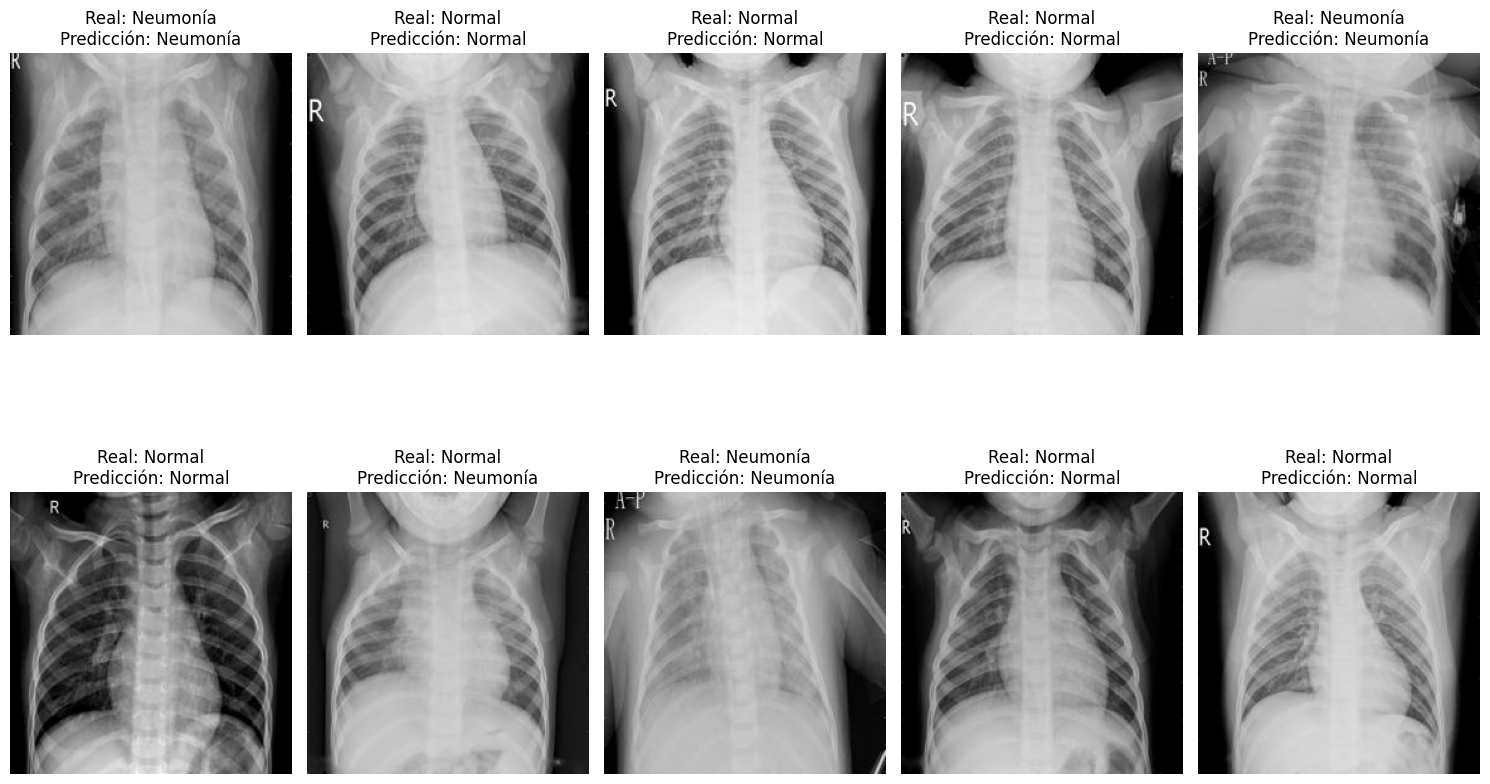

In [15]:
from tensorflow.keras.models import load_model

# Cargar el modelo ensamblado
ensemble_model = load_model('/content/drive/MyDrive/Archivos DS C8/Tareas/Tarea modulo 7/ensemble_model.keras')

# Definir la ruta del conjunto de validación
val_dir = '/content/drive/MyDrive/Archivos DS C8/Tareas/Tarea modulo 7/val_resized'

# Preparar el generador de imágenes de validación
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(val_dir, target_size=(224, 224), batch_size=1,
                                                class_mode='binary', shuffle=True)

# Seleccionar 10 imágenes aleatorias de validación
random_indices = random.sample(range(len(val_generator.filenames)), 10)

# Crear una figura para mostrar las imágenes
plt.figure(figsize=(15, 10))

for i, idx in enumerate(random_indices):
    img, label = val_generator[idx]  # Cargar la imagen y la etiqueta real
    prediction = ensemble_model.predict(img)  # Realizar la predicción

    # Convertir la predicción a clase binaria (0: Normal, 1: Neumonía)
    predicted_class = "Neumonía" if prediction > 0.5 else "Normal"
    real_class = "Neumonía" if label[0] == 1 else "Normal"

    # Mostrar la imagen con la predicción
    plt.subplot(2, 5, i + 1)
    plt.imshow(img[0])  # Mostrar la imagen (extraer de la lista)
    plt.title(f"Real: {real_class}\nPredicción: {predicted_class}", fontsize=12)
    plt.axis("off")

# Ajustar la visualización
plt.tight_layout()
plt.show()


## ***Gráficas de desempeño de modelo ensamblado***
Ambos modelos (MobileNetV2 y la CNN personalizada) mejoran su precisión con el tiempo.La CNN personalizada alcanza una precisión mayor que MobileNetV2 en todas las épocas, lo que sugiere que aprende más rápido o se ajusta mejor a los datos de entrenamiento.

La pérdida de ambos modelos disminuye con las épocas, indicando que están aprendiendo.La CNN personalizada muestra una reducción más rápida de la pérdida en comparación con MobileNetV2, lo que sugiere que se adapta mejor al conjunto de entrenamiento.

Respecto a matriz de confusión, el modelo tiene buena precisión y sensibilidad en la detección de neumonía, pero comete más errores al clasificar imágenes normales, lo que indica una tendencia a sobre-diagnosticar neumonía. Esto puede ser útil en entornos médicos, donde es preferible un falso positivo (erróneamente indicar neumonía) a un falso negativo (no detectar un caso real).



Found 5216 images belonging to 2 classes.
Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 62s 339ms/step - accuracy: 0.9380 - loss: 0.1623
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 53s 325ms/step - accuracy: 0.9611 - loss: 0.1106
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 54s 331ms/step - accuracy: 0.9665 - loss: 0.0857
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 55s 334ms/step - accuracy: 0.9762 - loss: 0.0781
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 54s 329ms/step - accuracy: 0.9732 - loss: 0.0761
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 54s 328ms/step - accuracy: 0.9743 - loss: 0.0685
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 55s 339ms/step - accuracy: 0.9794 - loss: 0.0604
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 55s 338ms/step - accuracy: 0.9774 - loss: 0.0668
Epoch 9/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 53s 324ms/step - accuracy: 0.9836 - loss: 0.0540
Epoch 10/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 53s 327ms/step - accuracy: 0.9853 - loss: 0.0488
Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 58s 325ms/step - accuracy: 

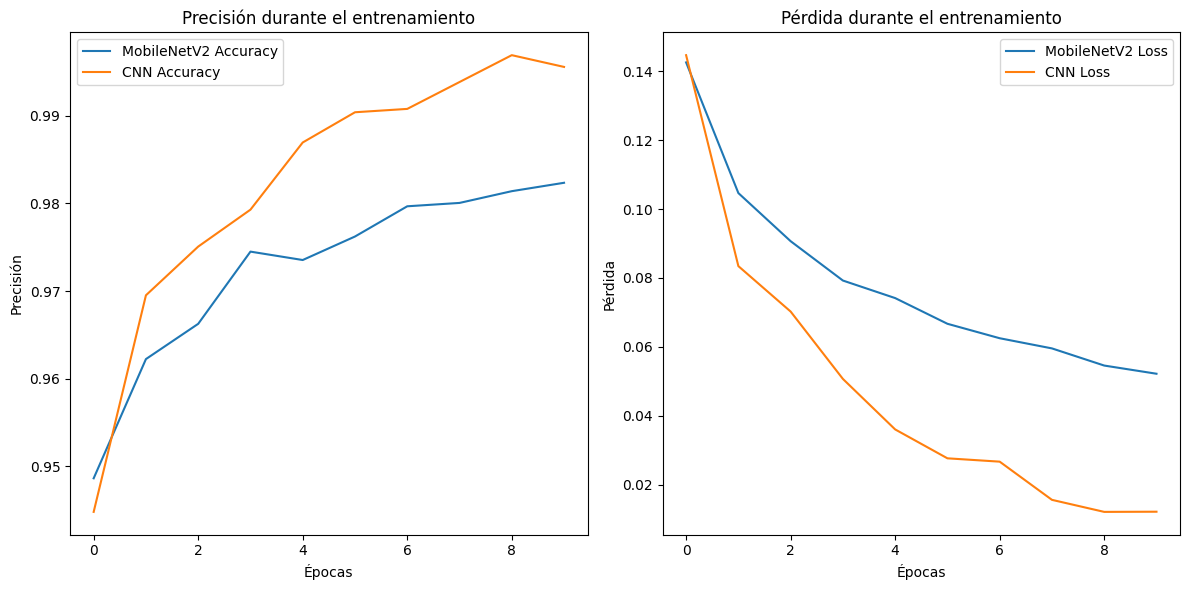

20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 162ms/step - accuracy: 0.4929 - loss: 1.6101
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.5028 - loss: 3.4448
Modelo 1 - Pérdida: 0.910068929195404, Precisión: 0.7243589758872986
Modelo 2 - Pérdida: 1.9615743160247803, Precisión: 0.7323718070983887


In [16]:
# Definir y compilar el modelo
model1 = tf.keras.models.load_model(model_paths[0])
model2 = tf.keras.models.load_model(model_paths[1])

# Cargar el generador de datos para entrenamiento
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Archivos DS C8/Tareas/Tarea modulo 7/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Volver a entrenar el modelo 1
history_model1 = model1.fit(
    train_generator,
    epochs=10,  # Número de épocas, puedes ajustarlo
    steps_per_epoch=train_generator.samples // train_generator.batch_size
)

# Volver a entrenar el modelo 2
history_model2 = model2.fit(
    train_generator,
    epochs=10,  # Número de épocas, puedes ajustarlo
    steps_per_epoch=train_generator.samples // train_generator.batch_size
)


# Cargar los historiales de entrenamiento de tus modelos
history_model1 = history_model1.history
history_model2 = history_model2.history


# Graficar la precisión
plt.figure(figsize=(12, 6))

# Precisión de cada modelo
plt.subplot(1, 2, 1)
plt.plot(history_model1['accuracy'], label='MobileNetV2 Accuracy')
plt.plot(history_model2['accuracy'], label='CNN Accuracy')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Graficar la pérdida
plt.subplot(1, 2, 2)
plt.plot(history_model1['loss'], label='MobileNetV2 Loss')
plt.plot(history_model2['loss'], label='CNN Loss')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Evaluar los modelos sobre el conjunto de prueba
test_loss_1, test_acc_1 = model1.evaluate(test_generator)
test_loss_2, test_acc_2 = model2.evaluate(test_generator)

# Imprimir las métricas de evaluación
print(f'Modelo 1 - Pérdida: {test_loss_1}, Precisión: {test_acc_1}')
print(f'Modelo 2 - Pérdida: {test_loss_2}, Precisión: {test_acc_2}')


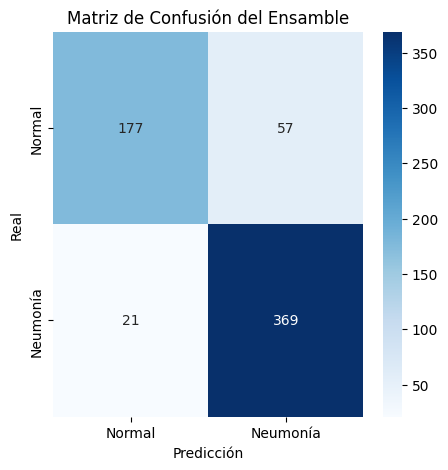

Reporte de Clasificación:
               precision    recall  f1-score   support

      Normal       0.89      0.76      0.82       234
    Neumonía       0.87      0.95      0.90       390

    accuracy                           0.88       624
   macro avg       0.88      0.85      0.86       624
weighted avg       0.88      0.88      0.87       624



In [17]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Generar matriz de confusión
conf_matrix = confusion_matrix(true_labels, final_predictions)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Neumonía'], yticklabels=['Normal', 'Neumonía'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión del Ensamble')
plt.show()


# Generar reporte de clasificación
report = classification_report(true_labels, final_predictions, target_names=['Normal', 'Neumonía'])
print("Reporte de Clasificación:\n", report)


## ***Código para ejecutar modelo en Talend API Tester***

In [18]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from flask import Flask, request, jsonify
import io
from PIL import Image

# Cargar el modelo ensamblado
MODEL_PATH = "/content/drive/MyDrive/Archivos DS C8/Tareas/Tarea modulo 7/ensemble_model.keras"
model = load_model(MODEL_PATH)

# Inicializar la aplicación Flask
app = Flask(__name__)

# Definir la ruta para realizar predicciones
@app.route("/predict", methods=["POST"])
def predict():
    if "file" not in request.files:
        return jsonify({"error": "No se encontró el archivo en la solicitud"}), 400

    file = request.files["file"]
    img = Image.open(io.BytesIO(file.read())).convert("RGB")
    img = img.resize((224, 224))  # Ajustar tamaño al que espera el modelo
    img_array = image.img_to_array(img) / 255.0  # Normalizar
    img_array = np.expand_dims(img_array, axis=0)  # Expandir dimensión para el modelo

    # Realizar predicción
    prediction = model.predict(img_array)[0][0]
    confidence = float(prediction)  # Obtener probabilidad
    label = "Neumonía" if prediction > 0.5 else "Normal"

    # Retornar respuesta JSON
    return jsonify({
        "diagnóstico": label,
        "confianza": f"{confidence * 100:.2f}%"  # Convertir a porcentaje
    })

# Ejecutar la API (modo local, usar ngrok para acceso público)
if __name__ == "__main__":
    app.run(host="0.0.0.0", port=5000)


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit
